In [132]:
import seaborn as sns
import pandas as pd
from constants import *
import pylab
import pingouin as pg
from scipy.stats import mannwhitneyu
import os

In [81]:
IDEOTYPES = {'T' : 'Blue',
             'dT' : 'Red', 'DT' : 'Red',
             'C' : 'Green', 'CT' : 'Green',
             'B' : 'Yellow'}
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}

In [82]:
best_of_best_df = pd.read_csv('%s/best_of_best.csv' % RESULTS_DIR, skipinitialspace=True)
best_of_best_df

,arbor name,optimal G,optimal alpha,optimal pt distance
0,001_1_C_day2,0.0,0.34,0.039285
1,001_1_C_day3,-0.2,0.56,0.467474
2,001_1_C_day4,-0.1,0.69,4.021863
3,001_1_C_day5,-0.1,0.71,27.309913
4,001_1_S_day2,0.3,0.35,0.007441
...,...,...,...,...
343,015_3_S_day4,-0.0,0.30,1.424947
344,015_3_S_day5,-0.0,0.30,18.621640
345,015_4_C_day2,0.2,0.80,0.200980
346,015_4_C_day3,1.2,0.50,1.907641


In [83]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C')
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT')
ideotypes_df['ideotype'] = ideotypes_df['ideotype (T/C/B)'].map(IDEOTYPES)
ideotypes_df['condition'] = ideotypes_df['condition'].map(CONDITIONS)
ideotypes_df.dropna(subset=['ideotype'], inplace=True)

In [84]:
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,PimpiBig4,233,1,Control,C,L,NaN,LR up,Green
1,PimpiBig4,281,1,Control,T,M,NaN,NaN,Blue
2,PimpiBig4,287,1,Control,T,M,NaN,NaN,Blue
3,PimpiBig4,246,2,Salt,C,L,IR,NaN,Green
4,PimpiBig4,263,3,Control,dT,L,NaN,NaN,Red
...,...,...,...,...,...,...,...,...,...
1443,PimpiBig1,126,308,Control,dT,M,NaN,NaN,Red
1444,PimpiBig1,144,308,Control,C,M,NaN,NaN,Green
1445,PimpiBig1,87,308,Salt,C,S,Y,NaN,Green
1446,PimpiBig1,131,308,Salt,C,M,D,NaN,Green


In [85]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df['genotype'].unique()

array(['M248', 'M058', 'LA1511', 'LA511', 'la1511', 'm248', 'm058', '288',
       '189', '214', '201', '306', '213', '207', '199', '212', '286',
       '220', '294', '287', '293', '195', '277', '300', '292', '283',
       '298', '291', '280', '284', '197', '290', '196', '308', '200',
       '211', '285', '301', '279', '194', '235', '278', '198', '282',
       '289', '307', '299', '192', '171', '147', '252', '258', '166',
       '269', '270', '064', '253', '264', '193', '146', '140', '141',
       '267', '256', '260', '061', '062', '065', '251', '138', '272',
       '168', '139', '169', '083', '144', '165', '255', '172', '170',
       '268', '262', '261', '142', '167', '259', '191', '060', '066',
       '136', '143', '082', '063', '230', '234', '173', '084', '240',
       '236', '241', '231', '176', '228', '244', '237', '174', '274',
       '249', '247', '091', '227', '250', '093', '229', '271', '239',
       '221', '233', '225', '245', '038', '273', '248', '089', '085',
       '175', '

In [86]:
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiABA,M248_10_C_10aba_day5,5,1,M248,10,Control,10aba
1,PimpiABA,M248_9_C_10aba_day5,5,2,M248,9,Control,10aba
2,PimpiABA,M248_8_C_10aba_day5,5,3,M248,8,Control,10aba
3,PimpiABA,M248_7_C_10aba_day5,5,4,M248,7,Control,10aba
4,PimpiABA,M248_6_C_10aba_day5,5,5,M248,6,Control,10aba
...,...,...,...,...,...,...,...,...
9790,PimpiIAA1,1511_2_C_noiaa_day9,9,148,1511,2,Control,noiaa
9791,PimpiIAA1,1511_3_C_noiaa_day9,9,149,1511,3,Control,noiaa
9792,PimpiIAA1,1511_4_C_noiaa_day9,9,150,1511,4,Control,noiaa
9793,PimpiIAA1,1511_5_C_noiaa_day9,9,151,1511,5,Control,noiaa


In [128]:
arbor_stats_df = pd.merge(best_of_best_df, metadata_df, on = 'arbor name')

In [124]:
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,001_1_C_day2,0.0,0.34,0.039285,PimpiBig4,2,233,001,1,Control,NaN
1,001_1_C_day3,-0.2,0.56,0.467474,PimpiBig4,3,233,001,1,Control,NaN
2,001_1_C_day4,-0.1,0.69,4.021863,PimpiBig4,4,235,001,1,Control,NaN
3,001_1_C_day5,-0.1,0.71,27.309913,PimpiBig4,5,233,001,1,Control,NaN
4,001_1_S_day2,0.3,0.35,0.007441,PimpiBig4,2,30,001,1,Salt,NaN
...,...,...,...,...,...,...,...,...,...,...,...
346,015_3_S_day4,-0.0,0.30,1.424947,PimpiBig6,4,79,015,3,Salt,NaN
347,015_3_S_day5,-0.0,0.30,18.621640,PimpiBig6,5,79,015,3,Salt,NaN
348,015_4_C_day2,0.2,0.80,0.200980,PimpiBig6,2,55,015,4,Control,NaN
349,015_4_C_day3,1.2,0.50,1.907641,PimpiBig6,3,55,015,4,Control,NaN


In [125]:
arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str).str.lstrip('0')
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,001_1_C_day2,0.0,0.34,0.039285,PimpiBig4,2,233,1,1,Control,NaN
1,001_1_C_day3,-0.2,0.56,0.467474,PimpiBig4,3,233,1,1,Control,NaN
2,001_1_C_day4,-0.1,0.69,4.021863,PimpiBig4,4,235,1,1,Control,NaN
3,001_1_C_day5,-0.1,0.71,27.309913,PimpiBig4,5,233,1,1,Control,NaN
4,001_1_S_day2,0.3,0.35,0.007441,PimpiBig4,2,30,1,1,Salt,NaN
...,...,...,...,...,...,...,...,...,...,...,...
346,015_3_S_day4,-0.0,0.30,1.424947,PimpiBig6,4,79,15,3,Salt,NaN
347,015_3_S_day5,-0.0,0.30,18.621640,PimpiBig6,5,79,15,3,Salt,NaN
348,015_4_C_day2,0.2,0.80,0.200980,PimpiBig6,2,55,15,4,Control,NaN
349,015_4_C_day3,1.2,0.50,1.907641,PimpiBig6,3,55,15,4,Control,NaN


In [126]:
test = pd.merge(arbor_stats_df, ideotypes_df, on = ['experiment', 'genotype','condition', 'Picture #'])
test

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,001_1_C_day2,0.0,0.34,0.039285,PimpiBig4,2,233,1,1,Control,NaN,C,L,NaN,LR up,Green
1,001_1_C_day3,-0.2,0.56,0.467474,PimpiBig4,3,233,1,1,Control,NaN,C,L,NaN,LR up,Green
2,001_1_C_day5,-0.1,0.71,27.309913,PimpiBig4,5,233,1,1,Control,NaN,C,L,NaN,LR up,Green
3,001_2_C_day2,-0.3,0.49,0.013003,PimpiBig4,2,287,1,2,Control,NaN,T,M,NaN,NaN,Blue
4,001_2_C_day3,0.0,0.53,1.396555,PimpiBig4,3,287,1,2,Control,NaN,T,M,NaN,NaN,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,015_3_S_day4,-0.0,0.30,1.424947,PimpiBig6,4,79,15,3,Salt,NaN,C,L,D,NaN,Green
102,015_3_S_day5,-0.0,0.30,18.621640,PimpiBig6,5,79,15,3,Salt,NaN,C,L,D,NaN,Green
103,015_4_C_day2,0.2,0.80,0.200980,PimpiBig6,2,55,15,4,Control,NaN,T,L,NaN,NaN,Blue
104,015_4_C_day3,1.2,0.50,1.907641,PimpiBig6,3,55,15,4,Control,NaN,T,L,NaN,NaN,Blue


In [116]:
print(arbor_stats_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())


experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


In [117]:
print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


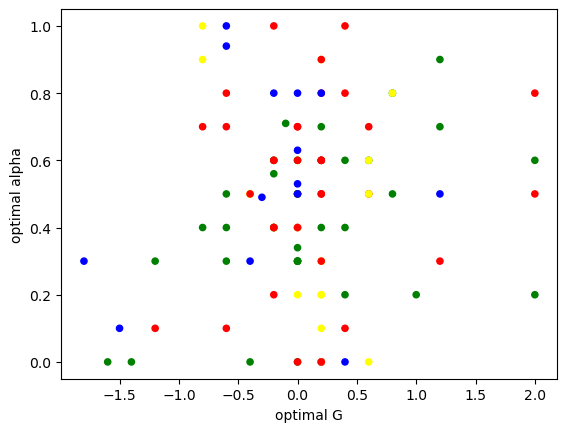

In [127]:
results = test.plot.scatter(x = 'optimal G', y = 'optimal alpha', c='ideotype')

In [89]:
last_day_arbors = arbor_stats_df.sort_values('day', ascending=False)
last_day_arbors = last_day_arbors.drop_duplicates(['experiment', 'genotype', 'replicate', 'condition'])
last_day_arbors

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
281,012_3_S_day5,0.2,0.2,26.214647,PimpiBig4,5,306,012,3,Salt,NaN
102,005_4_C_day5,-0.0,0.7,15.879516,PimpiBig4,5,102,005,4,Control,NaN
264,012_1_S_day5,-0.8,1.0,575.416278,PimpiBig4,5,326,012,1,Salt,NaN
133,007_1_S_day5,-0.2,0.2,6.262724,PimpiBig4,5,4,007,1,Salt,NaN
268,012_2_C_day5,-0.0,0.2,33.199128,PimpiBig4,5,154,012,2,Control,NaN
...,...,...,...,...,...,...,...,...,...,...,...
310,013_3_C_day5,0.2,0.0,780.832119,PimpiBig4,5,275,013,3,Control,NaN
7,001_1_S_day5,-0.4,0.1,2.184169,PimpiBig4,5,30,001,1,Salt,NaN
63,002_4_S_day5,0.4,0.3,29.114588,PimpiBig4,5,82,002,4,Salt,NaN
347,015_3_S_day5,-0.0,0.3,18.621640,PimpiBig6,5,79,015,3,Salt,NaN


In [90]:
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)
last_day_arbors['genotype'] = last_day_arbors['genotype'].astype(str)

In [91]:
ideotypes_df.dtypes

experiment          object
Picture #            int64
genotype            object
condition           object
ideotype (T/C/B)    object
size (L/M/S)        object
Sodium gap?         object
comments extra      object
ideotype            object
dtype: object

In [92]:
last_day_arbors.dtypes

arbor name              object
optimal G              float64
optimal alpha          float64
optimal pt distance    float64
experiment              object
day                      int64
Picture #                int64
genotype                object
replicate                int64
condition               object
hormone                 object
dtype: object

In [93]:
last_day_arbors['genotype'].unique()

array(['012', '005', '007', '006', '013', '003', '011', '009', '010',
       '008', '014', '015', '002', '001'], dtype=object)

In [94]:
ideotypes_df['genotype'].unique()

array(['1', '2', '3', '5', '6', '8', '9', '10', '11', '12', '13', '14',
       '15', '17', '19', '20', '21', '22', '23', '24', '27', '28', '29',
       '30', '31', '33', '34', '35', '36', '37', '38', '40', '42', '43',
       '44', '45', '46', '48', '49', '50', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '69', '70', '72', '73', '74', '75', '76', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92',
       '93', '94', '95', '96', '98', '99', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '111', '112', '113', '115',
       '116', '117', '118', '119', '120', '121', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '135', '136', '138',
       '139', '140', '141', '142', '143', '144', '146', '147', '149',
       '150', '151', '153', '154', '155', '156', '157', '158', '159',
       '160', '162', '165', '166', '167', '168', '169', '170', '171',

In [95]:
print(last_day_arbors[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


In [96]:
print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     2
dtype: int64


In [97]:

ideotypes_df.dropna(subset=['experiment', 'Picture #', 'genotype', 'condition'], inplace=True)

In [98]:

print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].drop_duplicates().head())

  experiment  Picture # genotype condition
0  PimpiBig4        233        1   Control
1  PimpiBig4        281        1   Control
2  PimpiBig4        287        1   Control
3  PimpiBig4        246        2      Salt
4  PimpiBig4        263        3   Control


In [99]:
print(last_day_arbors[['experiment', 'Picture #', 'genotype', 'condition']].drop_duplicates().head())

    experiment  Picture # genotype condition
281  PimpiBig4        306      012      Salt
102  PimpiBig4        102      005   Control
264  PimpiBig4        326      012      Salt
133  PimpiBig4          4      007      Salt
268  PimpiBig4        154      012   Control


In [100]:
last_day_arbors
last_day_arbors['genotype'] = last_day_arbors['genotype'].astype(str).str.lstrip('0')
last_day_arbors

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
281,012_3_S_day5,0.2,0.2,26.214647,PimpiBig4,5,306,12,3,Salt,NaN
102,005_4_C_day5,-0.0,0.7,15.879516,PimpiBig4,5,102,5,4,Control,NaN
264,012_1_S_day5,-0.8,1.0,575.416278,PimpiBig4,5,326,12,1,Salt,NaN
133,007_1_S_day5,-0.2,0.2,6.262724,PimpiBig4,5,4,7,1,Salt,NaN
268,012_2_C_day5,-0.0,0.2,33.199128,PimpiBig4,5,154,12,2,Control,NaN
...,...,...,...,...,...,...,...,...,...,...,...
310,013_3_C_day5,0.2,0.0,780.832119,PimpiBig4,5,275,13,3,Control,NaN
7,001_1_S_day5,-0.4,0.1,2.184169,PimpiBig4,5,30,1,1,Salt,NaN
63,002_4_S_day5,0.4,0.3,29.114588,PimpiBig4,5,82,2,4,Salt,NaN
347,015_3_S_day5,-0.0,0.3,18.621640,PimpiBig6,5,79,15,3,Salt,NaN


In [101]:
arbor_ideotypes = pd.merge(last_day_arbors, ideotypes_df)
arbor_ideotypes

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,012_3_S_day5,0.2,0.20,26.214647,PimpiBig4,5,306,12,3,Salt,NaN,B,L,L,NaN,Yellow
1,012_1_S_day5,-0.8,1.00,575.416278,PimpiBig4,5,326,12,1,Salt,NaN,B,M,N,NaN,Yellow
2,006_1_S_day5,0.2,0.40,0.553634,PimpiBig4,5,302,6,1,Salt,NaN,C,L,D,NaN,Green
3,005_3_S_day5,-0.2,0.60,0.118841,PimpiBig4,5,307,5,3,Salt,NaN,dT,L,D,NaN,Red
4,005_3_C_day5,-0.0,0.60,22.364449,PimpiBig4,5,301,5,3,Control,NaN,B,L,NaN,NaN,Yellow
5,013_1_S_day5,0.2,0.90,1112.448555,PimpiBig4,5,226,13,1,Salt,NaN,B,L,L,NaN,Yellow
6,003_3_C_day5,-0.0,0.80,15.800506,PimpiBig4,5,291,3,3,Control,NaN,T,L,NaN,some LR up,Blue
7,013_2_C_day5,0.2,0.00,558.688285,PimpiBig4,5,289,13,2,Control,NaN,T,L,NaN,NaN,Blue
8,011_1_S_day5,-0.0,0.00,1.225910,PimpiBig4,5,240,11,1,Salt,NaN,C,M,IR,NaN,Green
9,009_4_S_day5,1.0,0.20,28.242081,PimpiBig4,5,236,9,4,Salt,NaN,C,L,Y,NaN,Green


In [143]:
for file in os.listdir(RECONSTRUCTIONS_DIR):
    parts = file.split("_")
    print(parts)
    genotype = parts[0]
    replicate = parts[1]
    condition = parts[2]
    day = parts[3].replace('.csv', '')
    print(genotype, replicate, condition, day)
    key = (genotype, replicate, condition)
    #print(key)
    break

['001', '1', 'C', 'day2.csv']
001 1 C day2


In [140]:
def get_last_day_files():
    files_by_genotype = {}
    
    for file_name in os.listdir(RECONSTRUCTIONS_DIR):
        parts = file_name.split('_')
        
        genotype = parts[0]
        replicate = parts[1]
        condition = parts[2]
        day = parts[3].replace('.csv', '')
        
        key = (genotype, replicate, condition)
        if key not in files_by_genotype:
            files_by_genotype[key] = {}
        
        files_by_genotype[key][day] = file_name
       
    last_day_files = {}
    for key, day_files in files_by_genotype.items():
        last_day = sorted(day_files.keys())[-1]
        last_day_files[key] = day_files[last_day]
    return last_day_files


In [142]:
testing = get_last_day_files()
print(testing)

{('001', '1', 'C'): '001_1_C_day5.csv', ('001', '1', 'S'): '001_1_S_day5.csv', ('001', '2', 'C'): '001_2_C_day5.csv', ('001', '2', 'S'): '001_2_S_day5.csv', ('001', '3', 'C'): '001_3_C_day5.csv', ('001', '3', 'S'): '001_3_S_day5.csv', ('001', '4', 'C'): '001_4_C_day5.csv', ('001', '4', 'S'): '001_4_S_day5.csv', ('002', '1', 'C'): '002_1_C_day5.csv', ('002', '1', 'S'): '002_1_S_day5.csv', ('002', '2', 'C'): '002_2_C_day5.csv', ('002', '2', 'S'): '002_2_S_day5.csv', ('002', '3', 'C'): '002_3_C_day5.csv', ('002', '3', 'S'): '002_3_S_day5.csv', ('002', '4', 'S'): '002_4_S_day5.csv', ('003', '1', 'C'): '003_1_C_day5.csv', ('003', '1', 'S'): '003_1_S_day5.csv', ('003', '2', 'S'): '003_2_S_day5.csv', ('003', '3', 'C'): '003_3_C_day5.csv', ('003', '3', 'S'): '003_3_S_day5.csv', ('005', '1', 'S'): '005_1_S_day5.csv', ('005', '2', 'C'): '005_2_C_day5.csv', ('005', '2', 'S'): '005_2_S_day5.csv', ('005', '3', 'C'): '005_3_C_day5.csv', ('005', '3', 'S'): '005_3_S_day5.csv', ('005', '4', 'C'): '005_